## Exploring Greening Laneways and Urban Forest Strategy
**Authored by:** Alireza Montazeri

**Duration:** 90 mins  
**Level:** Intermediate  
**Pre-requisite Skills:** Python, Data Analysis, Machine Learning

### Scenario

I am tasked with developing a model to predict air quality based on various environmental factors. The goal is to accurately forecast future Air Quality Index (AQI) values and identify key factors influencing air quality. Additionally, incorporating spatial data will allow for the analysis of geographical variations in air quality.

### What this use case will teach you

At the end of this use case you will:
- Understand how to clean and preprocess environmental datasets.
- Perform exploratory data analysis (EDA) to extract key insights.
- Conduct spatial analysis to visualize geographical variations in air quality.
- Develop and evaluate a machine learning model to predict AQI.
- Analyze the importance of different environmental factors in influencing air quality.
- Create an implementation framework for real-world application of the air quality prediction model.

### Background and Introduction

Air quality is a critical component of public health and environmental sustainability. By accurately predicting AQI values, cities can take proactive measures to mitigate pollution and protect public health. This use case explores how various environmental factors, such as temperature, humidity, and particulate matter, influence air quality. By incorporating spatial data, we aim to identify geographical variations and hotspots of poor air quality, providing actionable insights for policymakers and environmental agencies.

### Datasets Used

1. **Microclimate sensors data:** This dataset contains climate readings from climate sensors located within the City. The data is updated every fifteen minutes and can be used to determine variations in microclimate changes throughout the day.(https://data.melbourne.vic.gov.au/explore/dataset/microclimate-sensors-data/information/)
2. **Argyle Square Air Quality:** Air quality measures in Argyle Square.(https://data.melbourne.vic.gov.au/explore/dataset/argyle-square-air-quality/information/)

These datasets are sourced from the City of Melbourne's open data portal.

### Implementation

**Step 1: Data Cleaning and Preprocessing**
- Load and inspect the datasets.
- Clean and preprocess the data to handle missing values and ensure consistency.

**Step 2: Exploratory Data Analysis (EDA)**
- Generate summary statistics for key metrics.
- Conduct spatial analysis to map the distribution of air quality measurements.
- Identify outliers to understand anomalies.
- Use geospatial techniques to visualize geographical variations in air quality.

**Step 3: Model Development and Evaluation**
- Split the data into training and testing sets.
- Develop a machine learning model (e.g., Random Forest, Gradient Boosting) to predict AQI.
- Evaluate the model's performance using appropriate metrics (e.g., RMSE, MAE).

**Step 4: Feature Importance Analysis**
- Analyze the importance of different environmental factors in predicting AQI.
- Visualize the contribution of each factor to the model's predictions.

**6: Implementation Framework**
- Create a phased implementation plan for deploying the model in real-world scenarios.
- Integrate monitoring and evaluation mechanisms to assess the model's performance over time.

### Conclusion

By following this use case, you will gain a comprehensive understanding of how to leverage data analysis, machine learning, and geospatial techniques to predict air quality. The actionable insights and recommendations derived from this analysis will aid in improving air quality management and policy-making, contributing to a healthier and more sustainable urban environment.


In [1]:
# Import required modules

import requests
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
import folium

from sklearn.impute import KNNImputer

## Get_Dataset Function

In this section, I define a function called `Get_Dataset` that retrieves data from the API. The function takes a `dataset_id` as a parameter and returns the dataset in the form of a pandas dataframe. The function performs the following steps:
- Constructs the API URL based on the `dataset_id`.
- Sends a GET request to the API with the specified parameters.
- If the response status code is 200 (indicating a successful request), the CSV data is read using `StringIO` and converted to a pandas dataframe.
- If the response status code is not 200, an error message is printed.

In [3]:
"""
Get unlimited data from the API v2.1

Parameters:
dataset_id (string): dataset if as from city of Melbourne (https://data.melbourne.vic.gov.au/)

Returns:
Pandas Dataframe: Returns the dataset in shape of pandas dataframe
"""
def Get_Dataset(dataset_id): # pass in dataset id 
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets'

    format = 'csv'

    url = f'{base_url}/{dataset_id}/exports/{format}'
    params = {
        'select': '*',
        'limit': -1,  # all records
        'lang': 'en',
        'timezone': 'UTC'
    }

    # GET request
    response = requests.get(url, params=params)

    if response.status_code == 200:
        # StringIO to read the CSV data
        url_content = response.content.decode('utf-8')
        dataset = pd.read_csv(StringIO(url_content), delimiter=';')
        return dataset 
    else:
        return (print(f'Request failed with status code {response.status_code}'))

## Microclimate Dataset

In [4]:
# Get the first dataset 
microclimate_sensors_df = Get_Dataset('microclimate-sensors-data')
microclimate_sensors_df.head()

,device_id,received_at,sensorlocation,latlong,minimumwinddirection,averagewinddirection,maximumwinddirection,minimumwindspeed,averagewindspeed,gustwindspeed,airtemperature,relativehumidity,atmosphericpressure,pm25,pm10,noise
0,ICTMicroclimate-09,2024-07-17T15:33:32+00:00,SkyFarm (Jeff's Shed). Rooftop - Melbourne Con...,"-37.8223306, 144.9521696",0.0,300.0,359.0,0.0,0.9,3.5,8.7,86.3,1013.1,1.0,4.0,63.1
1,ICTMicroclimate-03,2024-07-17T15:06:13+00:00,CH1 rooftop,"-37.8140348, 144.96728",0.0,308.0,349.0,0.0,0.4,1.0,8.5,99.0,1008.7,3.0,5.0,69.7
2,ICTMicroclimate-07,2024-07-17T15:21:33+00:00,Tram Stop 7C - Melbourne Tennis Centre Precinc...,"-37.8222341, 144.9829409",0.0,262.0,354.0,0.0,0.4,1.6,9.0,85.0,1016.1,0.0,0.0,55.3
3,ICTMicroclimate-08,2024-07-17T15:40:34+00:00,Swanston St - Tram Stop 13 adjacent Federation...,"-37.8184515, 144.9678474",0.0,339.0,359.0,0.0,0.9,4.3,9.0,83.9,1014.1,1.0,1.0,60.6
4,ICTMicroclimate-02,2024-07-17T15:42:47+00:00,101 Collins St L11 Rooftop,"-37.814604, 144.9702991",7.0,118.0,261.0,1.4,2.1,4.1,9.0,96.7,1009.4,8.0,11.0,69.0


### Data Cleaning and Preprocessing

In this section, I perform data cleaning and preprocessing on the microclimate dataset. I check for missing values, fill them with appropriate values, and perform additional data transformations. I also extract latitude and longitude information from the 'latlong' column and drop the original column. Finally, I use the KNNImputer to fill missing latitude and longitude values with the nearest available values.

In [5]:
print(microclimate_sensors_df.info())
print("\n\nMissing values:")
print(microclimate_sensors_df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54068 entries, 0 to 54067
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   device_id             54068 non-null  object 
 1   received_at           54068 non-null  object 
 2   sensorlocation        53265 non-null  object 
 3   latlong               53265 non-null  object 
 4   minimumwinddirection  47009 non-null  float64
 5   averagewinddirection  54047 non-null  float64
 6   maximumwinddirection  47009 non-null  float64
 7   minimumwindspeed      47009 non-null  float64
 8   averagewindspeed      54047 non-null  float64
 9   gustwindspeed         47009 non-null  float64
 10  airtemperature        54047 non-null  float64
 11  relativehumidity      54047 non-null  float64
 12  atmosphericpressure   54047 non-null  float64
 13  pm25                  49141 non-null  float64
 14  pm10                  49141 non-null  float64
 15  noise              

In [6]:
microclimate_sensors_df.fillna({
    'sensorlocation': 'Unknown',
    'minimumwinddirection': microclimate_sensors_df['minimumwinddirection'].median(),
    'averagewinddirection': microclimate_sensors_df['averagewinddirection'].median(),
    'maximumwinddirection': microclimate_sensors_df['maximumwinddirection'].median(),
    'minimumwindspeed': microclimate_sensors_df['minimumwindspeed'].median(),
    'averagewindspeed': microclimate_sensors_df['averagewindspeed'].median(),
    'gustwindspeed': microclimate_sensors_df['gustwindspeed'].median(),
    'airtemperature': microclimate_sensors_df['airtemperature'].median(),
    'relativehumidity': microclimate_sensors_df['relativehumidity'].median(),
    'atmosphericpressure': microclimate_sensors_df['atmosphericpressure'].median(),
    'pm25': microclimate_sensors_df['pm25'].median(),
    'pm10': microclimate_sensors_df['pm10'].median(),
    'noise': microclimate_sensors_df['noise'].median()
}, inplace=True)

# Extracting Lat & Long
microclimate_sensors_df[['lat', 'long']] = microclimate_sensors_df['latlong'].str.split(',', expand=True).astype(float)
# Dropping the original LatLong column
microclimate_sensors_df.drop(columns=['latlong'], inplace=True)
# Using KNNImputer to fill missing Latitude and Longitude values with the nearest available values
microclimate_sensors_df[['lat', 'long']] = KNNImputer(n_neighbors=5).fit_transform(microclimate_sensors_df[['lat', 'long']])


# Converting the 'Time' column to datetime
microclimate_sensors_df['received_at'] = pd.to_datetime(microclimate_sensors_df['received_at'])
# Extracting additional time-related features
microclimate_sensors_df['Year'] = microclimate_sensors_df['received_at'].dt.year
microclimate_sensors_df['Month'] = microclimate_sensors_df['received_at'].dt.month
microclimate_sensors_df['Day'] = microclimate_sensors_df['received_at'].dt.day
microclimate_sensors_df['Hour'] = microclimate_sensors_df['received_at'].dt.hour
microclimate_sensors_df['Minute'] = microclimate_sensors_df['received_at'].dt.minute
microclimate_sensors_df['Second'] = microclimate_sensors_df['received_at'].dt.second

# Displaying the first few rows of the processed microclimate_sensors_df
print(microclimate_sensors_df.info())
print("\n\nMissing values:")
print(microclimate_sensors_df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54068 entries, 0 to 54067
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   device_id             54068 non-null  object             
 1   received_at           54068 non-null  datetime64[ns, UTC]
 2   sensorlocation        54068 non-null  object             
 3   minimumwinddirection  54068 non-null  float64            
 4   averagewinddirection  54068 non-null  float64            
 5   maximumwinddirection  54068 non-null  float64            
 6   minimumwindspeed      54068 non-null  float64            
 7   averagewindspeed      54068 non-null  float64            
 8   gustwindspeed         54068 non-null  float64            
 9   airtemperature        54068 non-null  float64            
 10  relativehumidity      54068 non-null  float64            
 11  atmosphericpressure   54068 non-null  float64            
 12  pm25

### Exploratory Data Analysis (EDA)
In this section, I conduct exploratory data analysis on the microclimate dataset. 

- **Histogram:** I visualize the distribution of key variables using histograms. The plots provide insights into the data distribution and help identify any anomalies or patterns.

- **Pair Plots:** I create a pairplot of all numerical variables in the microclimate dataset. The pairplot shows the relationships between variables and includes regression lines for each scatter plot. This plot helps us understand the correlations and dependencies between different variables.

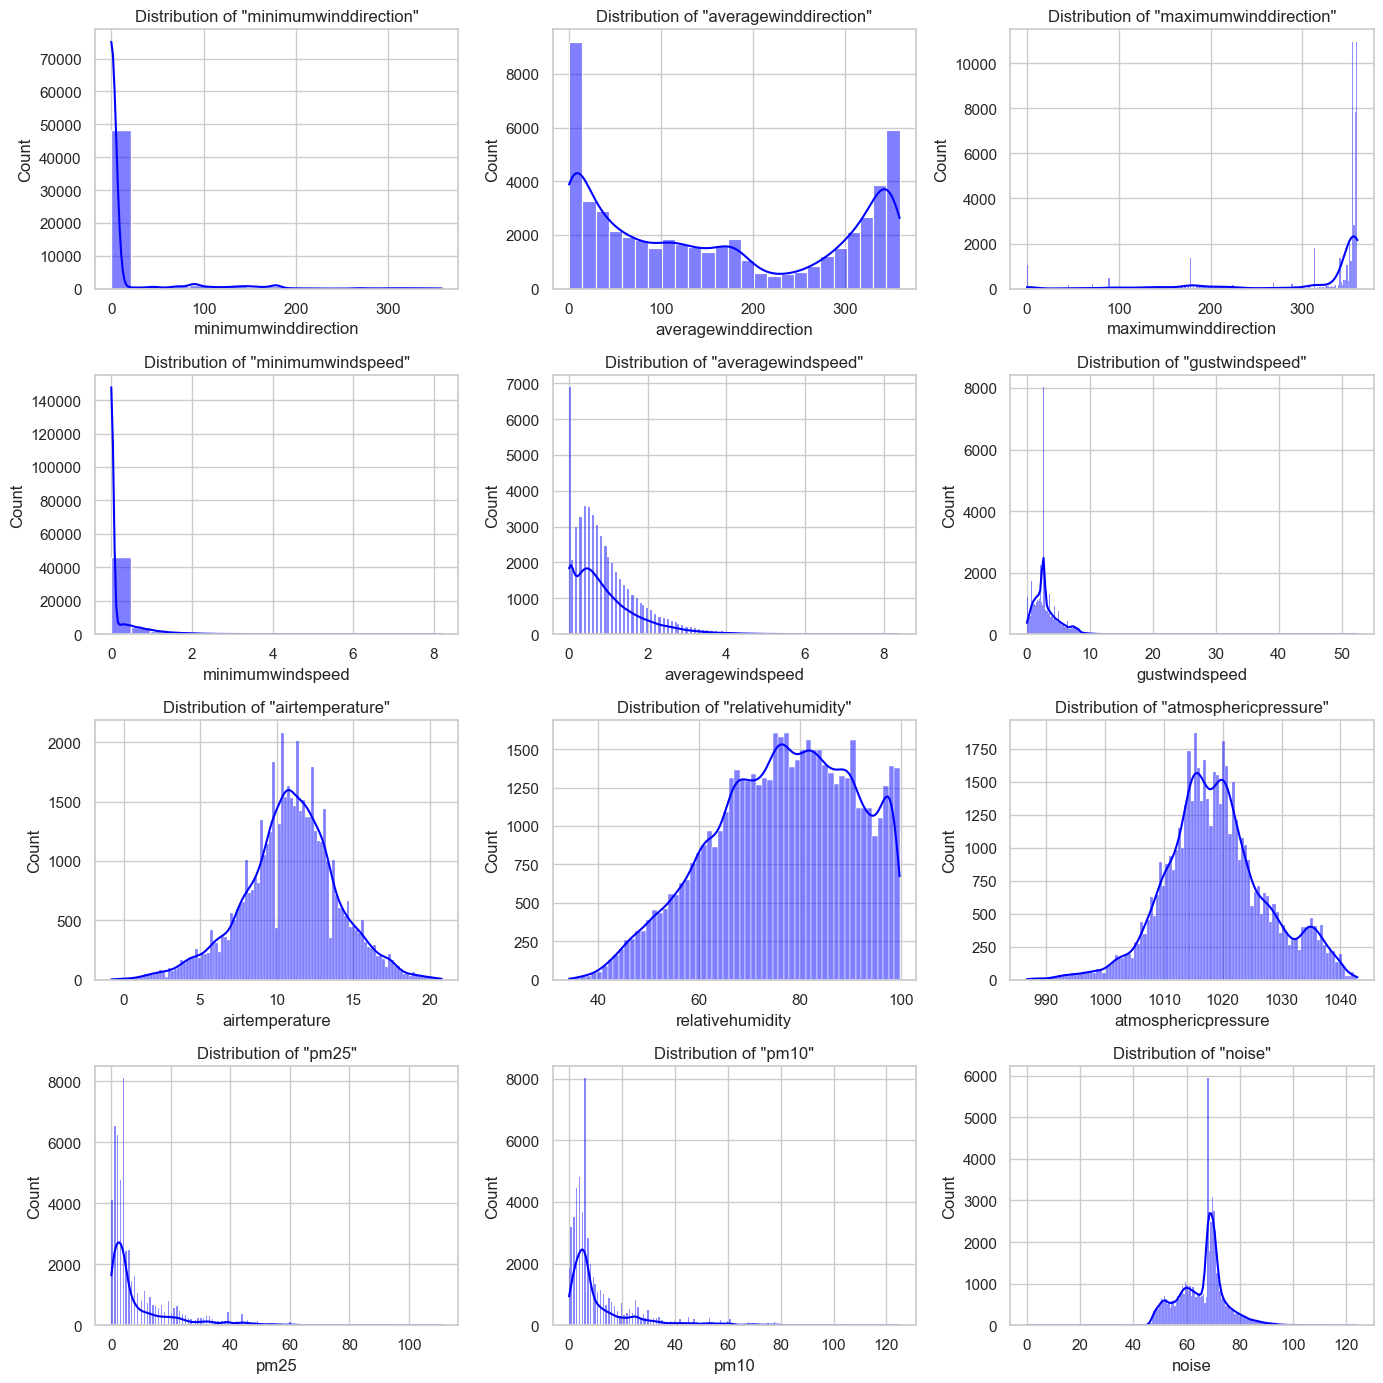

In [7]:
# Setting the aesthetics for the plots
sns.set_theme(style="whitegrid")

# Selecting only the numerical columns for the pairplot
float_columns = [col for col in microclimate_sensors_df.select_dtypes(include=['float64']).columns if col not in ['lat', 'long']]

# Plotting the distribution of key variables
fig, axes = plt.subplots(4, 3, figsize=(14, 14))

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, col_name in enumerate(float_columns):
    sns.histplot(microclimate_sensors_df[col_name], kde=True, ax=axes[i], color='blue')
    axes[i].set_title(f'Distribution of "{col_name}"')
    axes[i].set_xlabel(col_name)  # Add x-axis label
    axes[i].set_ylabel('Count')  # Add y-axis label

plt.tight_layout()
plt.show()


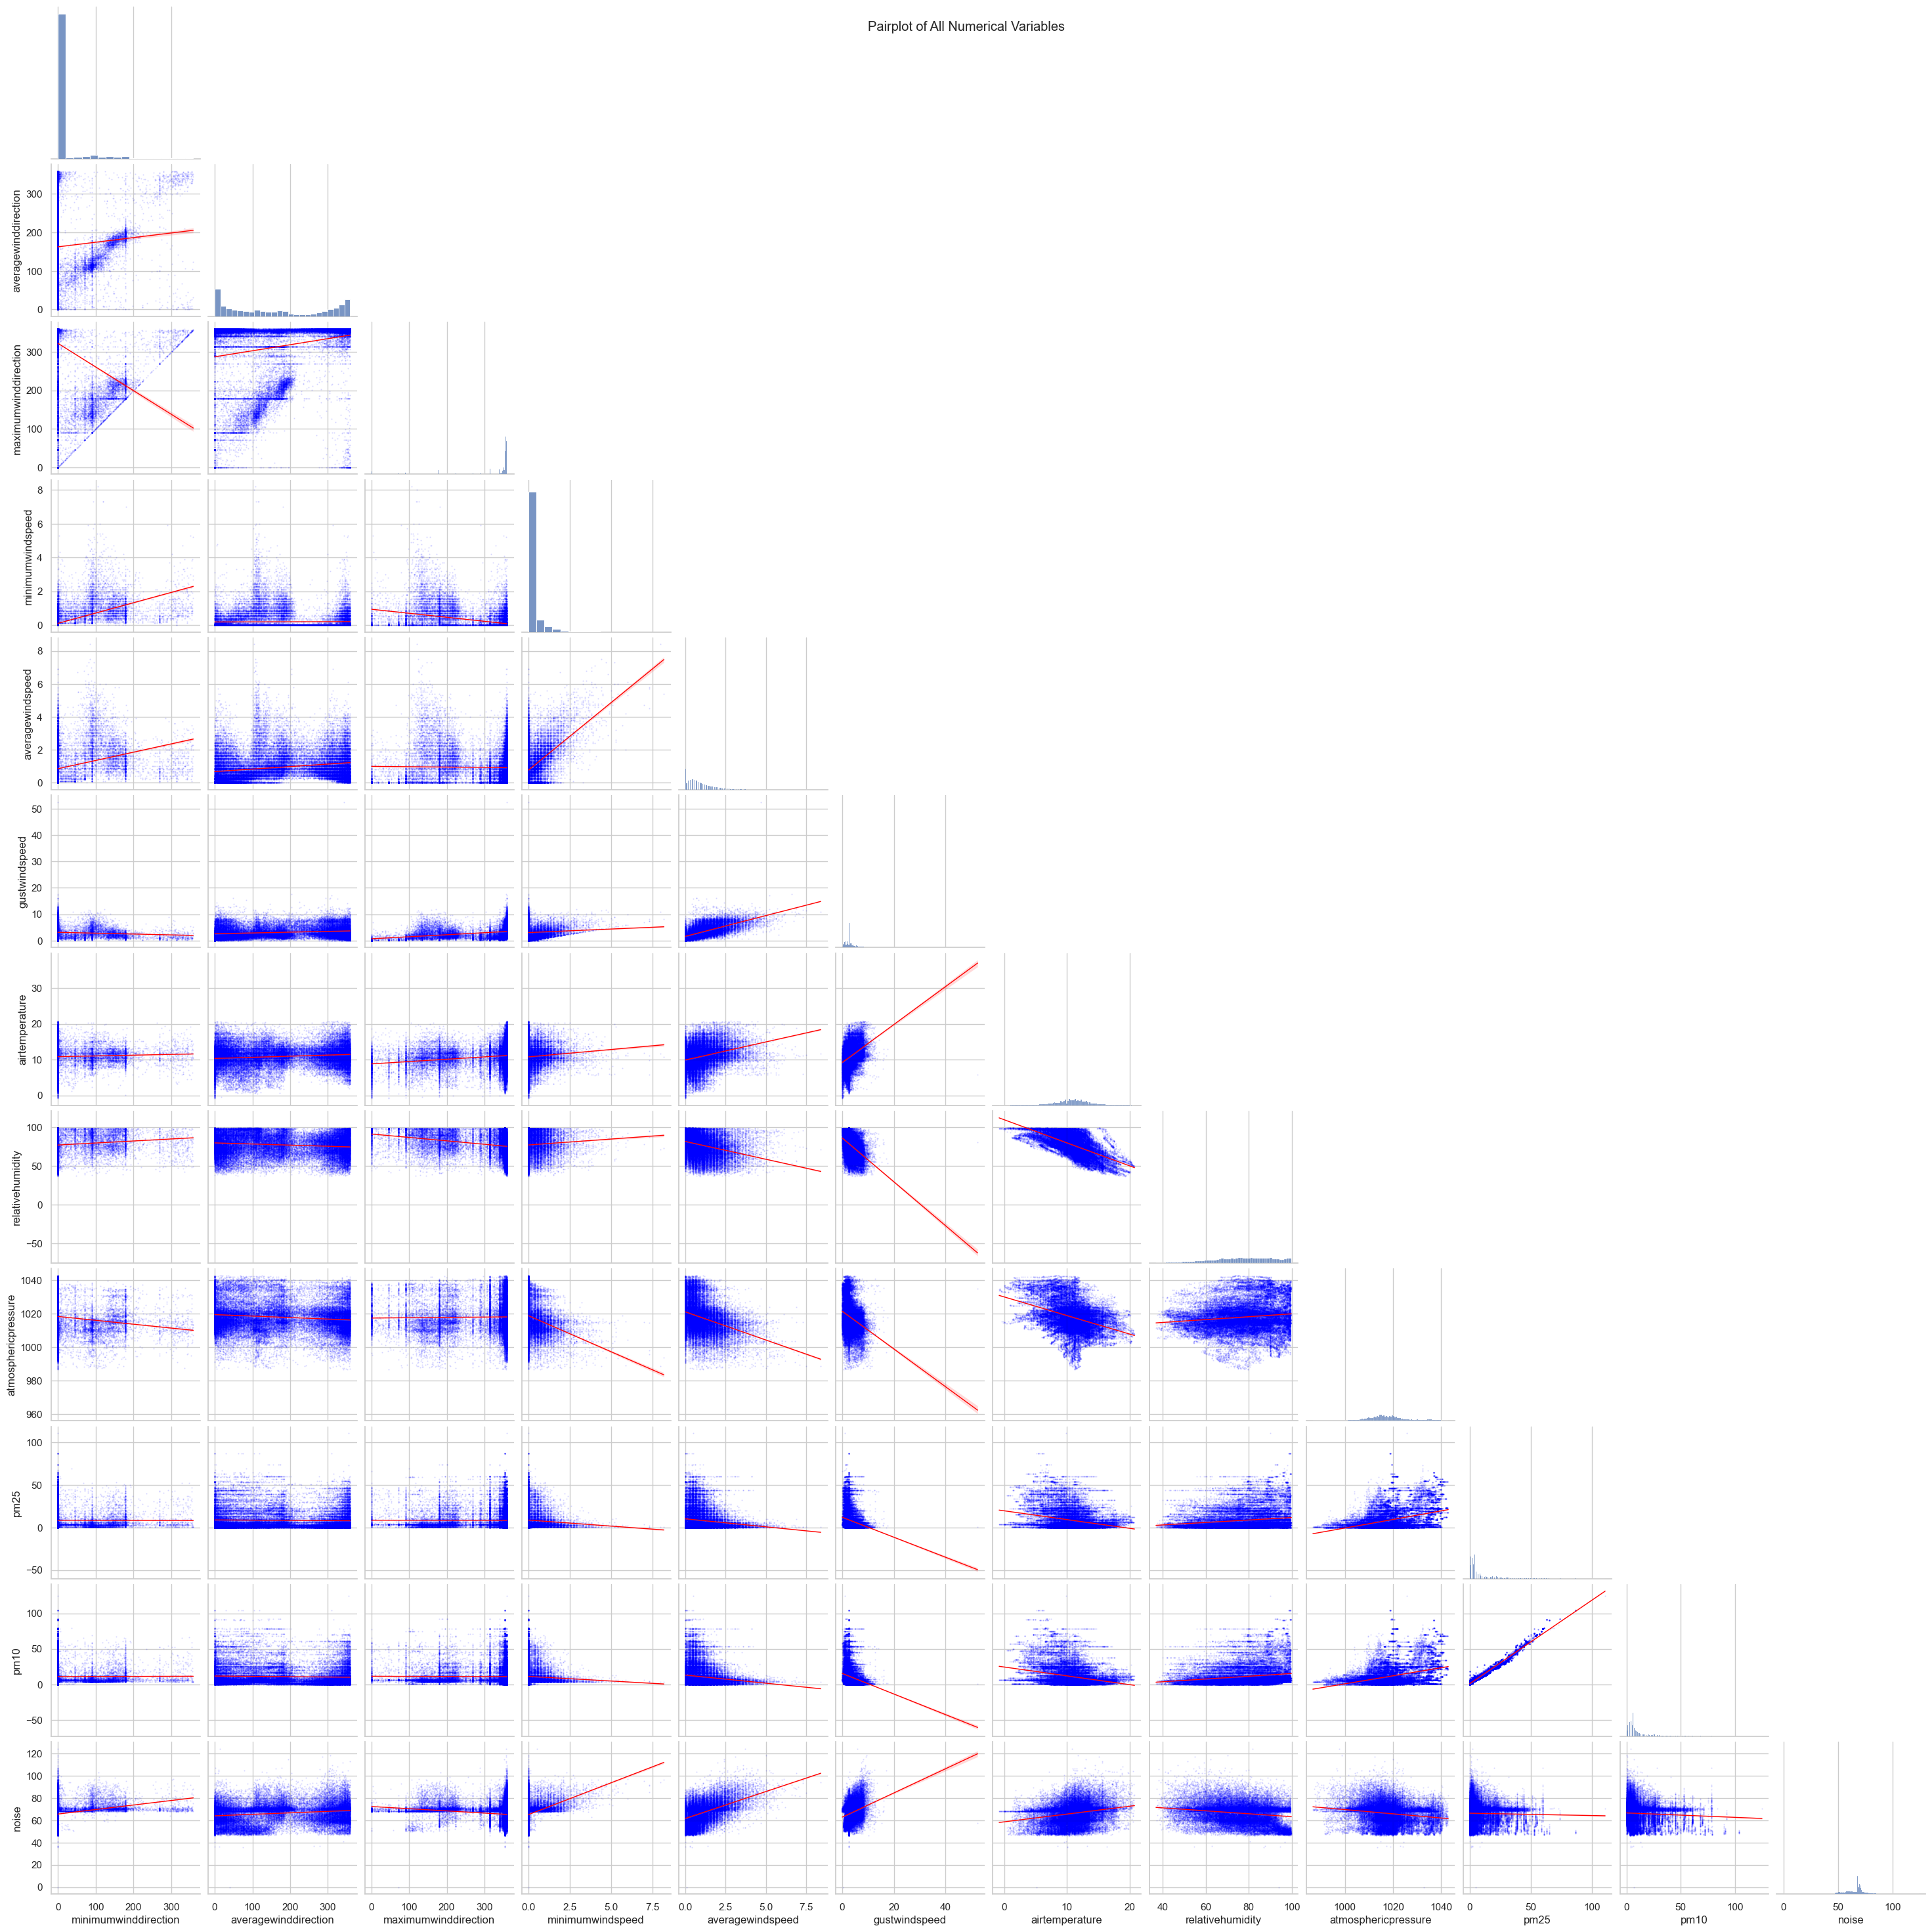

In [8]:
pairplot = sns.pairplot(
    microclimate_sensors_df[float_columns],
    corner=True,
    kind='reg',
    diag_kind='auto',
    plot_kws={'scatter_kws': {'s': 0.5, 'alpha': 0.1, 'color': 'blue'}, 'line_kws': {'color': 'red', 'linewidth': 1}}
)
pairplot.figure.suptitle('Pairplot of All Numerical Variables')
plt.show()

## Argyle Square Air Quality

In [8]:
# Get the second dataset 
argyle_air_quality_df = Get_Dataset('argyle-square-air-quality')
argyle_air_quality_df.head()

,time,dev_id,sensor_name,lat_long,averagespl,carbonmonoxide,humidity,ibatt,nitrogendioxide,ozone,particulateserr,particulatesvsn,peakspl,pm1,pm10,pm25,temperature,vbatt,vpanel
0,2020-06-09T09:02:38+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",56.0,-6448.0,65.0,71.0,287.0,137.0,0.0,151.0,69.0,12.0,19.0,17.0,12.3,3.96,0.00
1,2020-06-09T11:17:37+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",55.0,-6916.0,68.0,89.0,325.0,156.0,0.0,151.0,62.0,15.0,24.0,22.0,10.9,3.93,0.00
2,2022-05-03T21:46:34+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",58.0,-6261.0,77.0,169.0,268.0,137.0,0.0,151.0,64.0,0.0,0.0,0.0,15.1,3.76,16.33
3,2020-06-09T11:32:37+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",55.0,-6916.0,69.0,76.0,325.0,156.0,0.0,151.0,68.0,19.0,29.0,24.0,10.5,3.92,0.00
4,2021-05-15T06:04:33+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",56.0,-6261.0,51.0,12.0,258.0,119.0,0.0,151.0,62.0,0.0,0.0,0.0,14.9,4.01,18.33


### Data Cleaning and Preprocessing
In this section, I perform data cleaning and preprocessing on the Argyle Square air quality dataset. I check for missing values and remove rows where all specified columns have missing values. I also extract latitude and longitude information from the 'lat_long' column and drop the original column.

In [9]:
print(argyle_air_quality_df.info())
print("\n\nMissing values:")
print(argyle_air_quality_df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142507 entries, 0 to 142506
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   time             142507 non-null  object 
 1   dev_id           142507 non-null  object 
 2   sensor_name      142507 non-null  object 
 3   lat_long         142507 non-null  object 
 4   averagespl       132660 non-null  float64
 5   carbonmonoxide   132660 non-null  float64
 6   humidity         132660 non-null  float64
 7   ibatt            132660 non-null  float64
 8   nitrogendioxide  132660 non-null  float64
 9   ozone            132660 non-null  float64
 10  particulateserr  132660 non-null  float64
 11  particulatesvsn  132660 non-null  float64
 12  peakspl          132660 non-null  float64
 13  pm1              132660 non-null  float64
 14  pm10             132660 non-null  float64
 15  pm25             132660 non-null  float64
 16  temperature      132660 non-null  floa

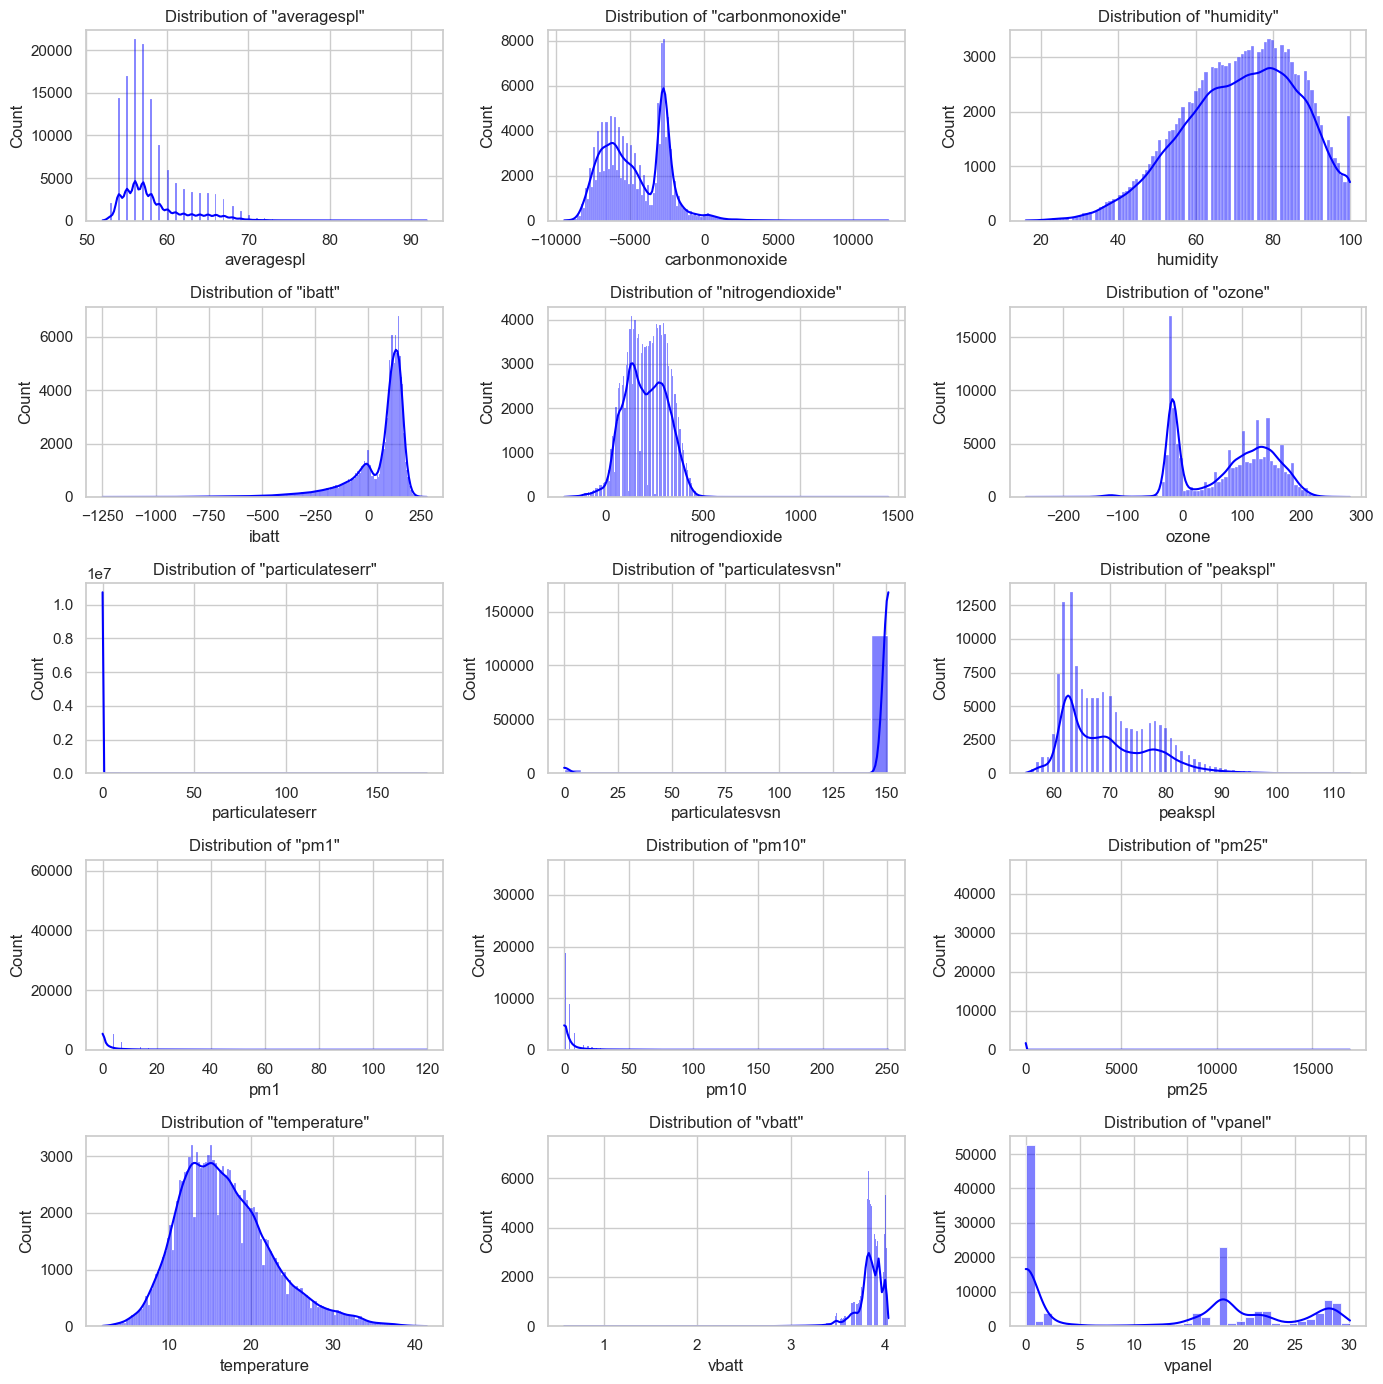

In [10]:
# Setting the aesthetics for the plots
sns.set_theme(style="whitegrid")

# Selecting only the numerical columns for the pairplot
float_columns = [col for col in argyle_air_quality_df.select_dtypes(include=['float64']).columns if col not in ['lat', 'long']]

# Plotting the distribution of key variables
fig, axes = plt.subplots(5, 3, figsize=(14, 14))

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, col_name in enumerate(float_columns):
    sns.histplot(argyle_air_quality_df[col_name], kde=True, ax=axes[i], color='blue')
    axes[i].set_title(f'Distribution of "{col_name}"')
    axes[i].set_xlabel('')  # Remove x-axis label
    axes[i].set_ylabel('')  # Remove y-axis label
    axes[i].set_xlabel(col_name)  # Add x-axis label
    axes[i].set_ylabel('Count')  # Add y-axis label

plt.tight_layout()
plt.show()

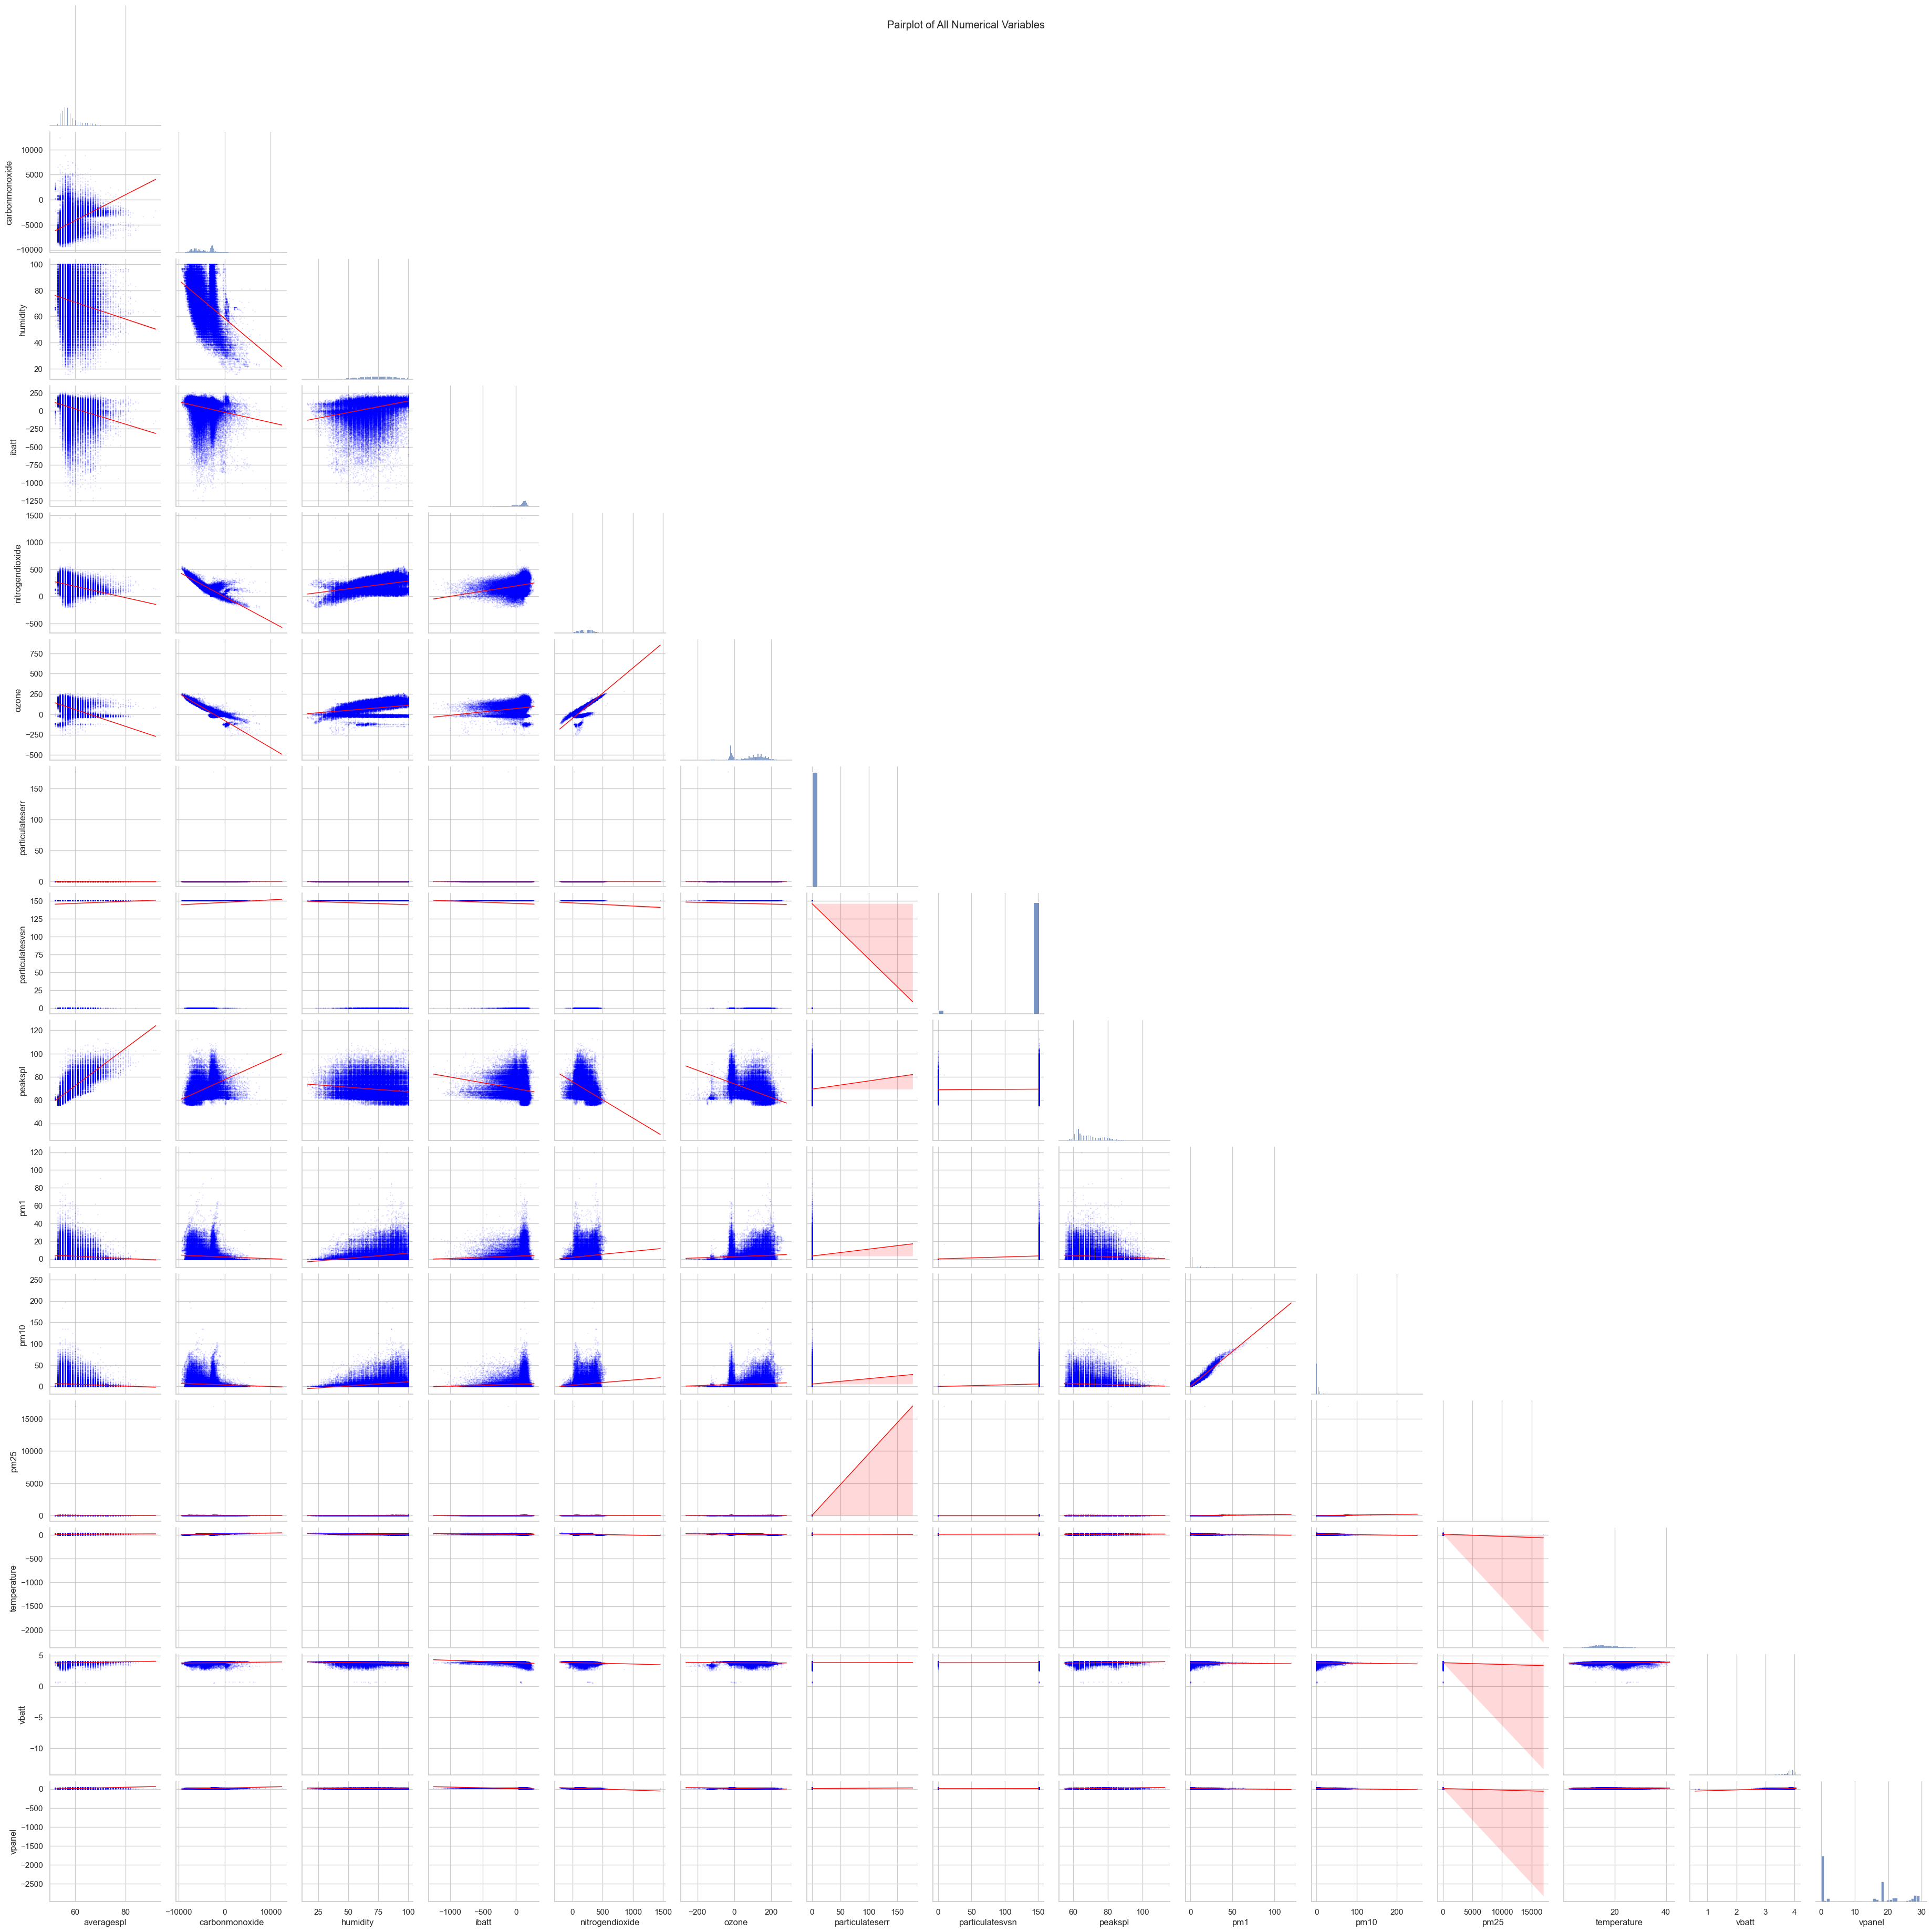

In [20]:
pairplot = sns.pairplot(
    argyle_air_quality_df[float_columns],
    corner=True,
    kind='reg',
    diag_kind='auto',
    plot_kws={'scatter_kws': {'s': 0.5, 'alpha': 0.1, 'color': 'blue'}, 'line_kws': {'color': 'red', 'linewidth': 1}}
)
pairplot.figure.suptitle('Pairplot of All Numerical Variables')
plt.show()

## Merge Datasets